In [100]:
%matplotlib inline
from os import listdir, path
from os.path import isfile, join
from keras.preprocessing.image import load_img
import itertools
from operator import itemgetter
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

data_path = 'data'

In [2]:
labels = listdir(data_path)
labels.remove('.DS_Store')
print(labels)

['bedroom', 'bathroom', 'dinning_room', 'living_room', 'house', 'kitchen', 'validation']


In [9]:
images = {}
for label in labels:
    images[label] = [load_img(path.join(data_path, label, f)).size for f in listdir(path.join(data_path, label)) if isfile(path.join(data_path, label, f)) and f not in ['Thumbs.db', '1434967DD415D64DC05090ECFA4BBD1E3AE9EB8E.jpg']]
print(images)

{'bedroom': [(600, 753), (1024, 683), (1200, 627), (1600, 1172), (1600, 1200), (1600, 1200), (1600, 1200), (1600, 1200), (1600, 1200), (4460, 2973), (1600, 1200), (1600, 1200), (1600, 1200), (1200, 888), (1170, 1200), (1200, 769), (1600, 1200), (1600, 1200), (1600, 1200), (1600, 1200), (432, 288), (960, 600), (557, 795), (1280, 853), (1600, 1200), (1600, 1200), (1600, 1200), (590, 609), (1600, 1200), (1600, 1200), (2551, 1701), (1600, 1170), (5100, 3400), (497, 640), (1349, 900), (1600, 1200), (1600, 1170), (1008, 792), (1600, 1200), (1600, 1167), (1600, 1200), (3791, 2538), (718, 507), (1600, 1200), (515, 349), (800, 600), (1600, 1200), (1600, 1200), (1040, 1200), (1200, 798), (1170, 1200), (800, 534), (3713, 5569), (1600, 1066), (1066, 1600), (1600, 1200), (1200, 774), (1600, 1200), (5472, 3648), (1600, 1200), (1600, 1200), (843, 891), (1600, 1200), (2678, 1736), (1600, 1172), (1280, 960), (2848, 4272), (1600, 1200), (1600, 1200), (1600, 1200), (398, 540), (1600, 1200), (4032, 3024),

In [18]:
for key in images.keys():
    print(key, ' - images count: ', len(images[key]))

bedroom  - images count:  571
bathroom  - images count:  362
dinning_room  - images count:  246
living_room  - images count:  524
house  - images count:  185
kitchen  - images count:  345
validation  - images count:  551


In [61]:
all_images = np.array(list(itertools.chain.from_iterable(images.values())))
print('All images: ', all_images.shape[0])
print('Avg shape: ', np.average(all_images[:,0]), np.average(all_images[:,1]))
print('Min dimensions: ', np.min(all_images[:,0]), np.min(all_images[:,1]))
print('Max dimensions: ', np.max(all_images[:,0]), np.max(all_images[:,1]))
print('Std. dev: ', np.std(all_images[:,0]), np.std(all_images[:,1]))

All images:  2784
Avg shape:  1591.155172413793 1244.9392959770114
Min dimensions:  180 119
Max dimensions:  7093 5884
Std. dev:  1118.0582268480794 861.9112405675805


In [95]:
ratios = [round(all_images[i,0] / float(all_images[i,1]), 2) for i in range(all_images.shape[0])]
ratios_count = {}
for ratio in ratios:
    if str(ratio) not in ratios_count.keys():
        ratios_count[str(ratio)] = 1
    else:
        ratios_count[str(ratio)] += 1

x = [(k, v) for k, v in ratios_count.items()]  
x = sorted(x, key=itemgetter(1), reverse=True)
for ratio, count in x:
    print('Ratio: ', ratio, '  - count: ', count)

Ratio:  1.33   - count:  1126
Ratio:  1.5   - count:  497
Ratio:  0.75   - count:  87
Ratio:  0.67   - count:  82
Ratio:  1.37   - count:  80
Ratio:  1.78   - count:  80
Ratio:  1.51   - count:  77
Ratio:  0.98   - count:  60
Ratio:  1.0   - count:  50
Ratio:  0.87   - count:  32
Ratio:  1.49   - count:  29
Ratio:  1.25   - count:  27
Ratio:  1.34   - count:  22
Ratio:  0.66   - count:  17
Ratio:  0.73   - count:  17
Ratio:  0.8   - count:  15
Ratio:  1.47   - count:  15
Ratio:  1.3   - count:  14
Ratio:  0.97   - count:  13
Ratio:  1.4   - count:  12
Ratio:  1.52   - count:  12
Ratio:  1.53   - count:  12
Ratio:  1.6   - count:  11
Ratio:  1.48   - count:  11
Ratio:  1.42   - count:  10
Ratio:  1.26   - count:  10
Ratio:  0.74   - count:  9
Ratio:  1.43   - count:  9
Ratio:  1.91   - count:  8
Ratio:  1.35   - count:  8
Ratio:  1.56   - count:  8
Ratio:  1.55   - count:  8
Ratio:  1.41   - count:  8
Ratio:  1.29   - count:  8
Ratio:  1.31   - count:  8
Ratio:  1.32   - count:  8
Ratio

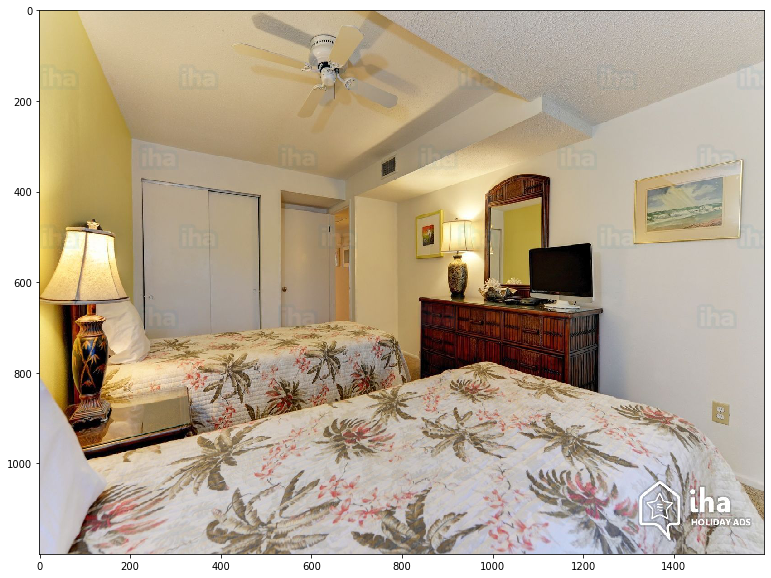

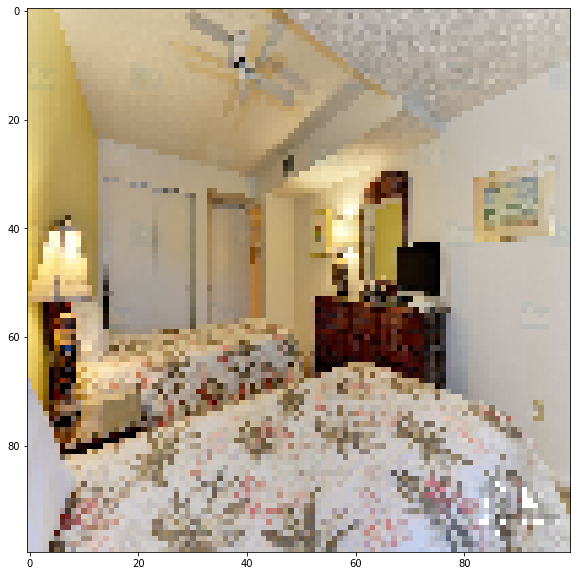

In [102]:
test_image = load_img(path.join(data_path, 'bedroom/0A36B673BA6513F772FB78FF597BE44F7E639A0F.jpg'))
plt.imshow(test_image)
plt.show()

downsampled = test_image.resize((100, 100))
plt.imshow(downsampled)
plt.show()